# 실습목표

### 1) 서울시 구별 인구수와 CCTV 설치 비율에 대한 분석을 위해 공공데이터를 확인하고 적절한 방법으로 처리하시오. 
### 2) 최근 3년간 CCTV증가율과 한국인, 외국인, 고령자의 비율에 따른 데이터 변화를 파악하시오.

# 0. 데이터 준비

### 서울시 공공데이터 다운 받기

#### 1. 서울시 자치구 년도별 CCTV 설치 현황 다운

* https://data.seoul.go.kr/dataList/datasetList.do 

* 서울 열린데이터 광장 → 서울시 자치구 년도별 CCTV 설치현황 검색 → 데이터 다운 (PC 다운시 파일명은 “서울시cctv”로 저장)

#### 2. 서울시 주민등록인구(구별) 통계 자료 다운

* http://data.seoul.go.kr/dataList/419/S/2/datasetView.do

* 서울 열린데이터 광장 → 서울시 주민등록인구(구별) 통계 → 데이터 다운(TXT) (PC 다운시 파일명은 “서울인구통계”로 저장)

# 1. 데이터 불러오고 구조파악하기

### [서울인구통계] 탭으로 분리된(tsv) .txt 텍스트파일 불러오기

In [2]:
import pandas as pd
import numpy as np

# 탭으로 분리된 텍스트 파일 불러오기
pop_seoul = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/서울인구통계.txt",sep="\t", engine="python", thousands = ",", encoding = "utf-8")
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2021.1/4,합계,4400403,9828094,4774856,5053238,9598484,4667524,4930960,229610,107332,122278,2.18,1567819
3,2021.1/4,종로구,74113,156567,75772,80795,147296,71644,75652,9271,4128,5143,1.99,27781
4,2021.1/4,중구,63746,133708,65312,68396,124552,60851,63701,9156,4461,4695,1.95,24767


### [서울인구통계] 자치구별 인구합계, 한국인 합계, 외국인 합계, 고령자 데이터만을 추출
#### index 0,1행은 중복으로 필요 없는 행으로 삭제

In [3]:
pop1=pop_seoul[["자치구","인구","인구.3","인구.6","65세이상고령자"]]
pop_seoul=pop1.drop([0,1])
pop_seoul.head()

,자치구,인구,인구.3,인구.6,65세이상고령자
2,합계,9828094,9598484,229610,1567819
3,종로구,156567,147296,9271,27781
4,중구,133708,124552,9156,24767
5,용산구,243336,229013,14323,39575
6,성동구,298421,291906,6515,45968


### [서울인구통계] 컬럼명을 구분할 수 있도록 리네임

In [4]:
# 컬럼명을 구분할 수 있도록 이름을 재지정해줌
pop_seoul.rename(columns={
    pop_seoul.columns[0]:"구별",
    pop_seoul.columns[1]:"인구수",
    pop_seoul.columns[2]:"한국인",
    pop_seoul.columns[3]:"외국인",
    pop_seoul.columns[4]:"고령자"},inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
2,합계,9828094,9598484,229610,1567819
3,종로구,156567,147296,9271,27781
4,중구,133708,124552,9156,24767
5,용산구,243336,229013,14323,39575
6,성동구,298421,291906,6515,45968


### [서울시 CCTV] 엑셀파일을 열고 5번째까지 자료를 읽기

In [5]:
cctv_seoul=pd.read_excel("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/서울시cctv.xlsx")
cctv_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


### [서울시 CCTV] 컬럼의 데이터를 확인

In [6]:
cctv_seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

### [서울시 CCTV] 인구통계 자료와 통일을 하기 위해 기관명을 구별로 인덱스 이름 변경

In [7]:
cctv_seoul.rename(columns={cctv_seoul.columns[0] : "구별"}, inplace=True)
cctv_seoul.rename(columns={cctv_seoul.columns[1] : "cctv수"}, inplace=True) # inplace=TRUE로 해야 값까지 다 포함해서 가져감
cctv_seoul.head() # 소계를 cctv수로 이름 변경

,구별,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


# 2. cctv 데이터 파악

### sort_values : 값을 기준으로 정렬, by=기준 열

In [8]:
cctv_seoul.sort_values(by="cctv수", ascending=True).head(10) #True 오름차순
#cctv수가 가장 작은 지역은 도봉구, 중랑구, 강북구 순으로 나타남

,구별,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
17,송 파 구,1586,600.0,99.0,88.0,21,166,100,116,396
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
11,동 작 구,1780,238.0,93.0,29.0,503,130,254,278,255


In [9]:
cctv_seoul.sort_values(by="cctv수", ascending=False).head(10) #False 내림차순
#cctv수가 가장 많은 지역은 강남구, 관악구, 구로구 순으로 나타남

,구별,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성 북 구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은 평 구,2962,1365.0,83.0,99.0,343,180,296,229,367
14,서 초 구,2835,1172.0,91.0,228.0,134,215,352,247,396
18,양 천 구,2775,772.0,161.0,185.0,169,172,349,137,830
15,성 동 구,2679,665.0,109.0,118.0,101,258,201,933,294
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793
13,서대문구,2121,565.0,233.0,214.0,114,109,277,415,194


### NaN 값 확인

In [10]:
cctv_seoul.isnull().sum()  #NaN 값이 있는 개수를 확인 가능
cctv_seoul.loc[cctv_seoul.isnull()["2011년 이전"]] #2011년 이전 열을 기준으로 NaN 값 추출
#동대문구, 중랑구에서 2013년까지의 데이터가 누락되어 있음. 데이터 유지, 삭제, 대체값 결정

,구별,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
10,동대문구,2003,NaN,NaN,NaN,1326,111,233,136,197
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9


### 최근 3년간 cctv 증가율 비교
#### 증가율 = 2016~2018 cctv 수/2016년 이전 cctv 수

In [11]:
cctv_seoul["최근증가율"]=(cctv_seoul["2018년"]+cctv_seoul["2017년"]+cctv_seoul["2016년"])/(cctv_seoul["cctv수"]-(cctv_seoul["2018년"]+cctv_seoul["2017년"]+cctv_seoul["2016년"]))*100
cctv_seoul.sort_values(by="최근증가율",ascending=False).head(5)

#최근 3년간 CCTV가 그 이전 대비 많이 증가한 구는 '중구', '영등포구', '성동구', '금전구', '광진구'라는 것도 알 수 있다.

,구별,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성 동 구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


# 3. 서울시 인구 데이터 파악

### 인구 데이터 확인

In [12]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
2,합계,9828094,9598484,229610,1567819
3,종로구,156567,147296,9271,27781
4,중구,133708,124552,9156,24767
5,용산구,243336,229013,14323,39575
6,성동구,298421,291906,6515,45968


### index 2의 행 삭제를 위해 [2] 입력 

In [13]:
pop_seoul.drop([2], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
3,종로구,156567,147296,9271,27781
4,중구,133708,124552,9156,24767
5,용산구,243336,229013,14323,39575
6,성동구,298421,291906,6515,45968
7,광진구,356191,343392,12799,50370


### 데이터 타입 확인. object로 연산이 불가 하기 때문에 int, float형으로 변경 필요

In [14]:
pop_seoul.dtypes
pop_seoul=pop_seoul.astype({"인구수":"int","한국인":"int","외국인":"int","고령자":"int"})

In [15]:
pop_seoul.dtypes

구별     object
인구수     int32
한국인     int32
외국인     int32
고령자     int32
dtype: object

### 구별 '외국인비율'과 '고령자비율'을 계산

In [16]:
pop_seoul["외국인 비율"]=pop_seoul["외국인"]/pop_seoul["인구수"]*100
pop_seoul["고령자 비율"]=pop_seoul["고령자"]/pop_seoul["인구수"]*100
pop_seoul.head()

#외국인비율과 고령자비율이 마지막열에 추가됨

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
3,종로구,156567,147296,9271,27781,5.921427,17.743841
4,중구,133708,124552,9156,24767,6.847758,18.523200
5,용산구,243336,229013,14323,39575,5.886100,16.263520
6,성동구,298421,291906,6515,45968,2.183157,15.403742
7,광진구,356191,343392,12799,50370,3.593297,14.141289


### 전체 '외국인비율', '외국인'으로 정렬

In [17]:
pop_seoul.sort_values(by="외국인 비율", ascending=False).head()
#외국인비율이 높은 구는 영등포구, 중구, 금천구, 구로구, 용산구 순으로 나타나고 있다.

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
4,중구,133708,124552,9156,24767,6.847758,18.523200
21,영등포구,403070,377590,25480,61197,6.321483,15.182723
20,금천구,244564,229844,14720,39781,6.018874,16.266090
19,구로구,426675,401074,25601,70717,6.000117,16.573973
3,종로구,156567,147296,9271,27781,5.921427,17.743841


In [18]:
pop_seoul.sort_values(by="고령자 비율", ascending=False).head()
#고령자 비율이 높은 구는 강북구, 도봉구, 중구, 종로구, 은평구 순으로 나타나고 있다

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
11,강북구,307537,304078,3459,62893,1.124743,20.450547
12,도봉구,323752,321717,2035,62360,0.628568,19.261657
4,중구,133708,124552,9156,24767,6.847758,18.523200
14,은평구,479607,475501,4106,85140,0.856118,17.752034
3,종로구,156567,147296,9271,27781,5.921427,17.743841


# 4. CCTV 데이터와 인구 데이터 합치고 분석

### cctv_seoul의 '구별' 열의 내용이 글자사이 공백으로 인해 병합이 되지 않기 때문에 rename 실시

In [19]:
cctv_seoul["구별"]=["강남구","강동구","강북구","강서구","관악구","광진구","구로구","금천구","노원구","도봉구",
"동대문구","동작구","마포구","서대문구","서초구","성동구","성북구","송파구","양천구","영등포구","용산구","은평구",
"종로구","중구","중랑구"]

### merge를 사용하여 병합

In [20]:
result = pd.merge(cctv_seoul, pop_seoul, on="구별")
result

#구별 열을 기준으로 cctv_seoul과 pop_seoul을 합친 데이터 생성

,구별,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,539538,534796,4742,75602,0.878900,14.012359
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,468815,464900,3915,71203,0.835084,15.187867
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,307537,304078,3459,62893,1.124743,20.450547
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,582804,577320,5484,89377,0.940968,15.335687
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,504140,490352,13788,78400,2.734955,15.551236
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295,356191,343392,12799,50370,3.593297,14.141289
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486,72.106667,426675,401074,25601,70717,6.000117,16.573973
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745,244564,229844,14720,39781,6.018874,16.266090
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156,42.026826,522225,518278,3947,85906,0.755804,16.449998
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71,66.601942,323752,321717,2035,62360,0.628568,19.261657


### 의미없는 컬럼을 del 명령어로 제거
### 일반적으로 행을 삭제할때는 drop, 열을 삭제할때는 del을 사용
### 2011~18년까지의 cctv수는 의미가 없으므로 삭제

In [21]:
del result["2011년 이전"]
del result["2012년"]
del result["2013년"]
del result["2014년"]
del result["2015년"]
del result["2016년"]
del result["2017년"]
del result["2018년"]
result.head()

,구별,cctv수,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,5221,52.171379,539538,534796,4742,75602,0.878900,14.012359
1,강동구,1879,82.960078,468815,464900,3915,71203,0.835084,15.187867
2,강북구,1265,83.068017,307537,304078,3459,62893,1.124743,20.450547
3,강서구,1617,77.887789,582804,577320,5484,89377,0.940968,15.335687
4,관악구,3985,99.150425,504140,490352,13788,78400,2.734955,15.551236


<AxesSubplot:xlabel='foreigner ratio', ylabel='cctv growth ratio'>

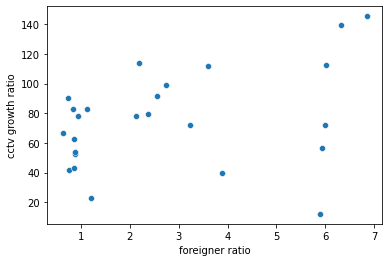

In [24]:
# 외국인 비율에 따른 CCTV 최근 증가율 관계를 보기 위해 산점도 출력
import seaborn as sb
result.rename(columns = {"외국인 비율" : "foreigner ratio"}, inplace = True)
result.rename(columns = {"최근증가율" : "cctv growth ratio"}, inplace = True)
sb.scatterplot(x="foreigner ratio", y="cctv growth ratio", data=result)